<a href="https://colab.research.google.com/github/xyaoaf/UrbanTreeStudywithLidar/blob/main/230329_AlternativePlanting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 73.3 MB/s eta 0:00:00


In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt

In [ ]:
# Read in the shapefile
shapefile_path = "/content/drive/MyDrive/XihanYAO_GISDataShare/230319_ENVImet/EastCrownJoinNonHedgeSpatialjoin.shp"
gdf = gpd.read_file(shapefile_path)
shapefile_path_west = "/content/drive/MyDrive/XihanYAO_GISDataShare/230319_ENVImet/WestCrownJoinNonHedgeSpatialjoin.shp"
gdfW = gpd.read_file(shapefile_path_west)

In [ ]:
gdfW

,Join_Count,TARGET_FID,height,winRadius,treeID,treeID_1,Functional,Condition,Family,DBH,height_1,crownArea,Cluster,size_categ,AlberoCode,geometry
0,1,3,37.235027,3.361751,4,4,BD,Fair,Sapindaceae,18.347,11.349236,139.168754,2,Middle,020030,POINT (527252.799 5043911.182)
1,1,4,47.283661,3.864183,5,5,BD,Fair,Sapindaceae,16.086,14.412060,168.247405,3,Old,030030,POINT (527353.688 5043911.182)
2,1,5,63.210457,4.660523,6,6,BD,Fair,Fagaceae,32.170,19.266547,297.940049,3,Old,030040,POINT (527430.498 5043910.877)
3,1,6,31.775927,3.088796,7,7,BD,Fair,Sapindaceae,15.496,9.685302,97.455289,2,Middle,020030,POINT (527161.359 5043910.572)
4,1,7,47.639343,3.881967,8,8,BD,Fair,Sapindaceae,26.327,14.520472,180.231898,3,Old,030030,POINT (526849.854 5043910.267)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,1,5545,36.945972,3.347299,5546,5546,BD,Fair,Sapindaceae,17.647,11.261132,73.393402,2,Middle,020030,POINT (527157.702 5042890.406)
2910,1,5546,43.111279,3.655564,5547,5547,BD,Fair,Sapindaceae,18.734,13.140318,123.839752,3,Old,030030,POINT (526750.794 5042887.663)
2911,1,5547,26.498652,2.824933,5548,5548,BD,Fair,Rosaceae,7.735,8.076789,22.203827,1,Young,010140,POINT (526863.265 5042887.663)
2912,1,5548,25.045738,2.752287,5549,5549,BD,Fair,Rosaceae,8.394,7.633941,17.744481,1,Young,010140,POINT (526872.104 5042887.663)


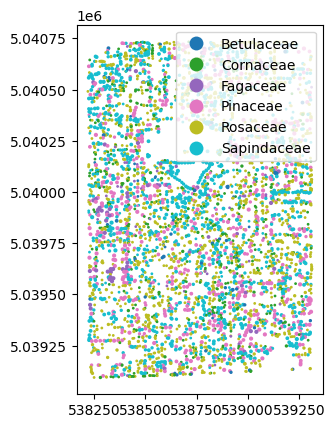

In [ ]:
# Define the columns to use for size and color
size_column = "Cluster"
color_column = "Family"

# Set up the plot
fig, ax = plt.subplots()

# Plot the points with size and color determined by the specified columns
gdf.plot(ax=ax, column=color_column, markersize=gdf[size_column], legend=True)

# Show the plot
plt.show()

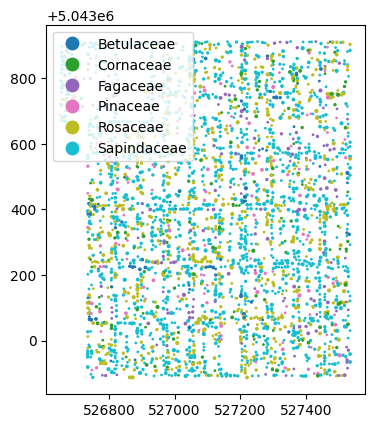

In [ ]:
# Define the columns to use for size and color
size_column = "Cluster"
color_column = "Family"

# Set up the plot
fig, ax = plt.subplots()

# Plot the points with size and color determined by the specified columns
gdfW.plot(ax=ax, column=color_column, markersize=gdf[size_column], legend=True)

# Show the plot
plt.show()

In [ ]:
# Get the CRS of the GeoDataFrame
crs = gdfW.crs

print(crs)

EPSG:32610


In [ ]:
# Define the dictionary
allpine = { '010111': '010027', 
            '020111': '020027', 
            '030111': '030027',
            '040112': '040027', 
            '010030': '010027', 
            '020030': '020027',  
            '030030': '030027', 
            '040030': '040027', 
            '010040': '010027',  
            '020040': '020027', 
            '030040': '030027', 
            '000040': '040027',  
            '010027': '010027', 
            '020027': '020027', 
            '030027': '030027',
            '040027': '040027',  
            '010130': '010027', 
            '020130': '020027', 
            '010140': '010027',  
            '020140': '020027', 
            '030140': '030027', 
            '000140': '040027',                   
              }

# Map the values and create a new column
gdf['All_pine'] = gdf['AlberoCode'].map(allpine)
gdfW['All_pine'] = gdfW['AlberoCode'].map(allpine)

In [ ]:
# Define the dictionary
allmaple = {'010111': '010030', 
            '020111': '020030', 
            '030111': '030030',
            '040112': '040030', 
            '010030': '010030', 
            '020030': '020030',  
            '030030': '030030', 
            '040030': '040030', 
            '010040': '010030',  
            '020040': '020030', 
            '030040': '030030', 
            '000040': '040030',  
            '010027': '010030', 
            '020027': '020030', 
            '030027': '030030',
            '040027': '040030',  
            '010130': '010030', 
            '020130': '020030', 
            '010140': '010030',  
            '020140': '020030', 
            '030140': '030030', 
            '000140': '040030',                   
              }

# Map the values and create a new column
gdf['All_maple'] = gdf['AlberoCode'].map(allmaple)
gdfW['All_maple'] = gdfW['AlberoCode'].map(allmaple)

In [ ]:
# Define the dictionary
aftergrowth = {'010111': '030111', 
            '020111': '030111', 
            '030111': '040112',
            '040112': '040112', 
            '010030': '030030', 
            '020030': '030030',  
            '030030': '040030', 
            '040030': '040030', 
            '010040': '030040',  
            '020040': '030040', 
            '030040': '000040', 
            '000040': '000040',  
            '010027': '030027', 
            '020027': '030027', 
            '030027': '040027',
            '040027': '040027',  
            '010130': '020130', 
            '020130': '020130', 
            '010140': '020140',  
            '020140': '020140', 
            '030140': '030140', 
            '000140': '000140',                   
              }

# Map the values and create a new column
gdf['After_growth'] = gdf['AlberoCode'].map(aftergrowth)
gdfW['After_growth'] = gdfW['AlberoCode'].map(aftergrowth)

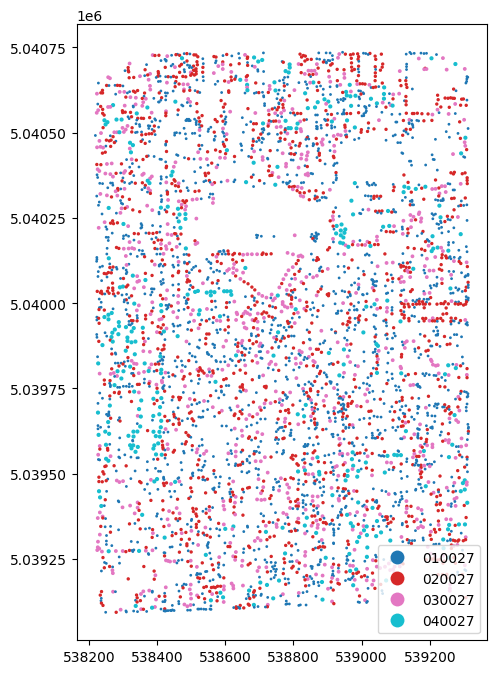

In [ ]:
# Define the columns to use for size and color
size_column = "Cluster"
color_column = "All_pine"

# Set up the plot
fig, ax = plt.subplots(figsize=(8,8))

# Plot the points with size and color determined by the specified columns
gdf.plot(ax=ax, column=color_column, markersize=gdf[size_column], legend=True)

# Show the plot
plt.show()

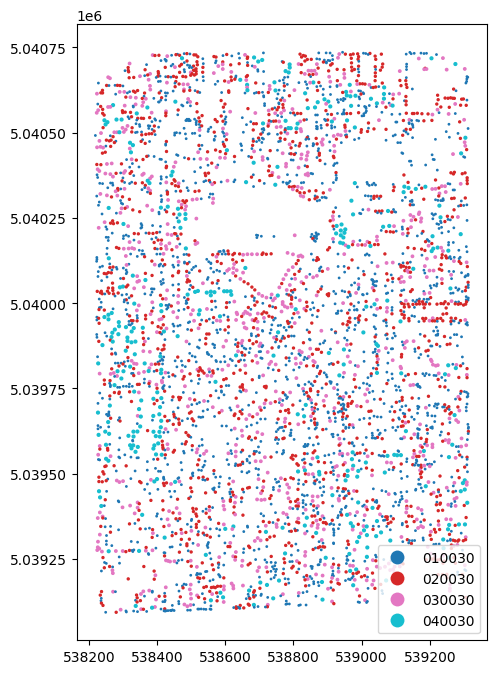

In [ ]:
# Define the columns to use for size and color
size_column = "Cluster"
color_column = "All_maple"

# Set up the plot
fig, ax = plt.subplots(figsize=(8,8))

# Plot the points with size and color determined by the specified columns
gdf.plot(ax=ax, column=color_column, markersize=gdf[size_column], legend=True)

# Show the plot
plt.show()

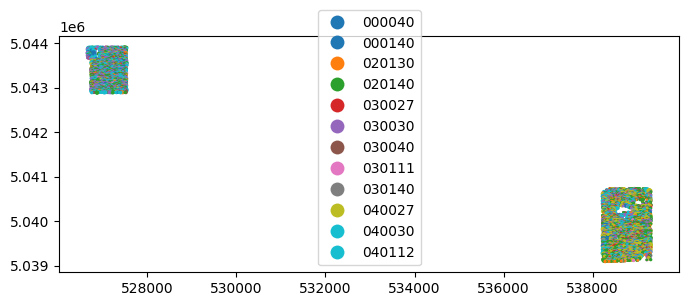

In [ ]:
# Define the columns to use for size and color
size_column = "Cluster"
color_column = "After_growth"

# Set up the plot
fig, ax = plt.subplots(figsize=(8,8))

# Plot the points with size and color determined by the specified columns
gdf.plot(ax=ax, column=color_column, markersize=gdf[size_column], legend=True)
# Plot the points with size and color determined by the specified columns
gdfW.plot(ax=ax, column=color_column, markersize=gdf[size_column], legend=True)

# Show the plot
plt.show()

In [ ]:
gdfW

,Join_Count,TARGET_FID,height,winRadius,treeID,treeID_1,Functional,Condition,Family,DBH,height_1,crownArea,Cluster,size_categ,AlberoCode,geometry,All_pine,All_maple,After_growth
0,1,3,37.235027,3.361751,4,4,BD,Fair,Sapindaceae,18.347,11.349236,139.168754,2,Middle,020030,POINT (527252.799 5043911.182),020027,020030,030030
1,1,4,47.283661,3.864183,5,5,BD,Fair,Sapindaceae,16.086,14.412060,168.247405,3,Old,030030,POINT (527353.688 5043911.182),030027,030030,040030
2,1,5,63.210457,4.660523,6,6,BD,Fair,Fagaceae,32.170,19.266547,297.940049,3,Old,030040,POINT (527430.498 5043910.877),030027,030030,000040
3,1,6,31.775927,3.088796,7,7,BD,Fair,Sapindaceae,15.496,9.685302,97.455289,2,Middle,020030,POINT (527161.359 5043910.572),020027,020030,030030
4,1,7,47.639343,3.881967,8,8,BD,Fair,Sapindaceae,26.327,14.520472,180.231898,3,Old,030030,POINT (526849.854 5043910.267),030027,030030,040030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2909,1,5545,36.945972,3.347299,5546,5546,BD,Fair,Sapindaceae,17.647,11.261132,73.393402,2,Middle,020030,POINT (527157.702 5042890.406),020027,020030,030030
2910,1,5546,43.111279,3.655564,5547,5547,BD,Fair,Sapindaceae,18.734,13.140318,123.839752,3,Old,030030,POINT (526750.794 5042887.663),030027,030030,040030
2911,1,5547,26.498652,2.824933,5548,5548,BD,Fair,Rosaceae,7.735,8.076789,22.203827,1,Young,010140,POINT (526863.265 5042887.663),010027,010030,020140
2912,1,5548,25.045738,2.752287,5549,5549,BD,Fair,Rosaceae,8.394,7.633941,17.744481,1,Young,010140,POINT (526872.104 5042887.663),010027,010030,020140


In [ ]:
# Write the updated shapefile to disk
output_shapefile_pathE = "/content/drive/MyDrive/XihanYAO_GISDataShare/230329_growthscenarios/EastTreesGrowthScenarios.shp"
gdf.to_file(output_shapefile_pathE)
# Write the updated shapefile to disk
output_shapefile_pathW = "/content/drive/MyDrive/XihanYAO_GISDataShare/230329_growthscenarios/WestTreesGrowthScenarios.shp"
gdfW.to_file(output_shapefile_pathW)

<ipython-input-48-af16d007737d>:3: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf.to_file(output_shapefile_pathE)
<ipython-input-48-af16d007737d>:6: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdfW.to_file(output_shapefile_pathW)
